# Statistics - HCI IYKRA

## Import Library

In [1]:
import numpy as np
import pandas as pd

## Load Data

In [7]:
df = pd.read_excel(r'D:\Analytics\Learning\DSA\25 Oct\Dataset-20191025T025912Z-001\Dataset\data loan.xlsx')

In [9]:
df.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,DP,AF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen
0,1,OTHERS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,0.0,2.76,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan
1,2,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,0.0,2.81,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others
2,3,OTHERS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,0.0,3.10,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28293 entries, 0 to 28292
Data columns (total 23 columns):
Kontrak                  28293 non-null int64
Tipe_Kendaraan           28293 non-null object
Pekerjaan                28293 non-null object
Area                     28293 non-null object
Tenor                    28293 non-null int64
Bucket_Collectability    28293 non-null object
NPF                      28293 non-null object
Total_AR                 28293 non-null float64
LTV                      28293 non-null float64
OTR                      28293 non-null float64
Age                      28293 non-null int64
Interest_Rate            28293 non-null float64
Income                   28293 non-null int64
DP                       28293 non-null float64
AF                       28293 non-null float64
Tujuan                   28293 non-null object
Pendidikan               28293 non-null object
Tanggungan               28293 non-null object
Status                   28293 non-null obj

In [12]:
numeric_data = df.select_dtypes(include =[np.number]).columns
categorical_data = df.select_dtypes(exclude =[np.number]).columns

In [13]:
numeric_data

Index(['Kontrak', 'Tenor', 'Total_AR', 'LTV', 'OTR', 'Age', 'Interest_Rate',
       'Income', 'DP', 'AF', 'Inflasi'],
      dtype='object')

## Transformasi Tipe_Kendaraan: Recoding 

In [15]:
df['Tipe_Kendaraan'].value_counts()

MINIBUS            14440
LCGC                6078
OTHERS              5657
TRUCK & PICK UP     2118
Name: Tipe_Kendaraan, dtype: int64

In [16]:
import copy

In [18]:
df_edit = copy.deepcopy(df)

In [20]:
df_edit['Tipe_Kendaraan']= df_edit.Tipe_Kendaraan.map({'MINIBUS':'MINIBUS','LCGC':'NONMINIBUS',
                                                       'OTHERS':'NONMINIBUS','TRUCK & PICK UP':'NONMINIBUS'})

In [21]:
df_edit['Tipe_Kendaraan'].value_counts()

MINIBUS       14440
NONMINIBUS    13853
Name: Tipe_Kendaraan, dtype: int64

In [22]:
df_edit['Tipe_Kendaraan'].value_counts().index

Index(['MINIBUS', 'NONMINIBUS'], dtype='object')

In [23]:
df_edit.describe()

,Kontrak,Tenor,Total_AR,LTV,OTR,Age,Interest_Rate,Income,DP,AF,Inflasi
count,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000,28293.000000
mean,14147.000000,45.104867,214.777125,81.146981,204.385958,40.680133,13.741759,20.449334,59.117309,163.551610,5.531061
std,8167.629919,13.281078,88.386433,14.986763,79.938138,9.564789,3.517159,115.608090,40.830083,64.204471,1.797010
min,1.000000,12.000000,1.401000,5.110000,1.690000,19.000000,0.000000,1.000000,0.000000,1.390000,3.210000
25%,7074.000000,36.000000,156.321600,77.870000,157.800000,34.000000,11.190000,9.000000,37.670000,122.480000,3.830000
50%,14147.000000,48.000000,201.120000,83.830000,187.700000,40.000000,13.450000,15.000000,47.700000,153.230000,5.310000
75%,21220.000000,60.000000,266.207999,89.360000,231.050000,48.000000,16.210000,20.000000,67.960000,193.310000,7.250000
max,28293.000000,60.000000,1854.341300,111.830000,1508.400000,82.000000,27.400000,10000.000000,721.350000,1312.810000,8.790000


In [29]:
df[categorical_data].describe()

,Tipe_Kendaraan,Pekerjaan,Area,Bucket_Collectability,NPF,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Segmen
count,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293,28293
unique,4,3,3,5,2,2,2,2,2,2,2,2
top,MINIBUS,Karyawan,Jawa,0 - 30 hari,Tidak,Private,Others,Tidak ada,OTHERS,Laki-laki,Tidak,Jasa & Perdagangan
freq,14440,13717,15677,12432,14373,24877,16033,15765,14255,20904,15961,16020


In [27]:
print(np.number)

<class 'numpy.number'>


## Transformasi Area: Dummy

In [30]:
df_edit['Area'].value_counts()

Jawa        15677
Sumatera     9872
Others       2744
Name: Area, dtype: int64

In [31]:
D_Area = pd.get_dummies(df_edit['Area'], prefix = 'Area')

In [33]:
D_Area.head(3)

,Area_Jawa,Area_Others,Area_Sumatera
0,1,0,0
1,1,0,0
2,1,0,0


In [34]:
D_Area_Jawa = D_Area.drop(columns='Area_Jawa')

In [35]:
D_Area_Jawa.head(3)

,Area_Others,Area_Sumatera
0,0,0
1,0,0
2,0,0


In [36]:
df_edit = pd.concat([df_edit,D_Area_Jawa], axis = 1)

In [37]:
df_edit.head(3)

,Kontrak,Tipe_Kendaraan,Pekerjaan,Area,Tenor,Bucket_Collectability,NPF,Total_AR,LTV,OTR,...,Tujuan,Pendidikan,Tanggungan,Status,Gender,Paket,Inflasi,Segmen,Area_Others,Area_Sumatera
0,1,NONMINIBUS,Karyawan,Jawa,12,>90 - 120 hari,Ya,2.763126,100.00,2.76,...,Private,Sarjana,Tidak ada,OTHERS,Laki-laki,Ya,3.58,Jasa & Perdagangan,0,0
1,2,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,2.805000,103.70,2.71,...,Private,Others,Tidak ada,MENIKAH,Laki-laki,Ya,3.58,Others,0,0
2,3,NONMINIBUS,Wiraswasta,Jawa,12,0 - 30 hari,Tidak,3.104000,103.33,3.00,...,Private,Sarjana,Tidak ada,OTHERS,Perempuan,Ya,4.17,Others,0,0


In [38]:
#Sisipan merubah nilai dengan fungsi numpy.where()

np.where(df_edit['Area']=='Jawa', )

(array([    0,     1,     2, ..., 28286, 28287, 28292], dtype=int64),)

In [40]:
np.where(df_edit['Area']=='Jawa', 'Jawa', 'Luar Jawa')

array(['Jawa', 'Jawa', 'Jawa', ..., 'Luar Jawa', 'Luar Jawa', 'Jawa'],
      dtype='<U9')

## Diskretisasi LTV

In [43]:
diskret_LTV = pd.cut(df_edit.LTV , 7)

In [44]:
diskret_LTV.head()

0    (96.584, 111.83]
1    (96.584, 111.83]
2    (96.584, 111.83]
3    (96.584, 111.83]
4    (96.584, 111.83]
Name: LTV, dtype: category
Categories (7, interval[float64]): [(5.003, 20.356] < (20.356, 35.601] < (35.601, 50.847] < (50.847, 66.093] < (66.093, 81.339] < (81.339, 96.584] < (96.584, 111.83]]

# Transformasi Income: Standardisasi

In [45]:
df_edit.describe()['Income']

count    28293.000000
mean        20.449334
std        115.608090
min          1.000000
25%          9.000000
50%         15.000000
75%         20.000000
max      10000.000000
Name: Income, dtype: float64

In [48]:
standardized_income = (df_edit['Income'] - df_edit['Income'].mean())/ df_edit['Income'].std()

In [49]:
standardized_income.head()

0   -0.090386
1   -0.047136
2   -0.003887
3   -0.047136
4   -0.003887
Name: Income, dtype: float64

In [52]:
df.Income.head()

0    10
1    15
2    20
3    15
4    20
Name: Income, dtype: int64

In [53]:
standardized_income.std()

0.9999999999999594

In [54]:
df.Income.std()

115.60808970422566

In [55]:
from matplotlib import pyplot as plt

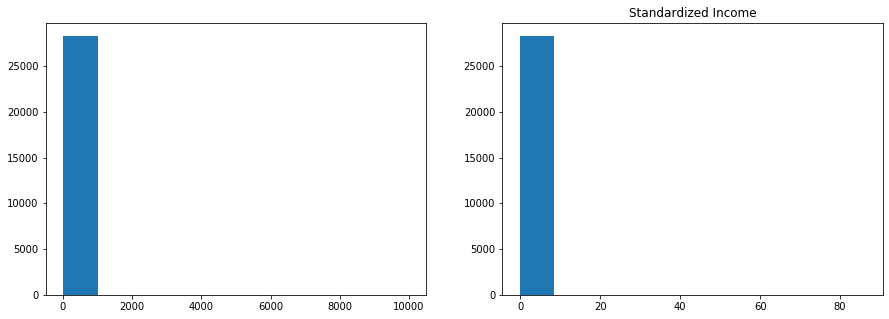

In [57]:
#visualisasi
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.hist(df_edit['Income'])
ax2.set_title('Income')

ax2.hist(standardized_income)
ax2.set_title('Standardized Income')

plt.show()

In [59]:
ln_Income = np.log(df_edit.Income)
ln_Income.head()

0    2.302585
1    2.708050
2    2.995732
3    2.708050
4    2.995732
Name: Income, dtype: float64

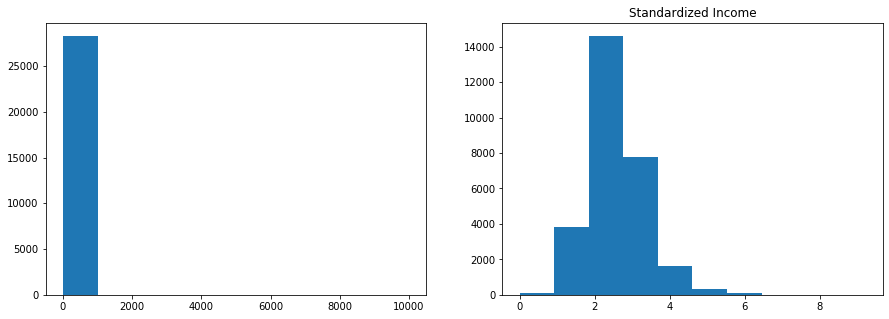

In [60]:
#visualisasi
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.hist(df_edit['Income'])
ax2.set_title('Income')

ax2.hist(ln_Income)
ax2.set_title('Standardized Income')

plt.show()

## Normalisasi Income

In [61]:
normalized_Income = (df_edit['Income']-df_edit['Income'].min())/(df_edit['Income'].max()-df_edit['Income'].min())
normalized_Income.head()

0    0.0009
1    0.0014
2    0.0019
3    0.0014
4    0.0019
Name: Income, dtype: float64

In [62]:
normalized_Income.describe()

count    28293.000000
mean         0.001945
std          0.011562
min          0.000000
25%          0.000800
50%          0.001400
75%          0.001900
max          1.000000
Name: Income, dtype: float64

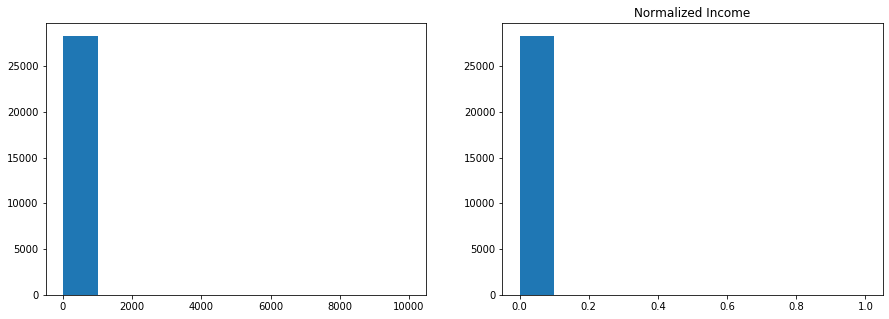

In [63]:
#visualisasi
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(15,5))

ax1.hist(df_edit['Income'])
ax2.set_title('Income')

ax2.hist(normalized_Income)
ax2.set_title('Normalized Income')

plt.show()

In [ ]:
#menggunakan normalisasi pada metode2 yang membutuhkan jarak. 

In [64]:
#Mendeteksi Outlier
z_Income = copy.deepcopy(standardized_income)

In [67]:
[np.abs(z_Income)>3]

[0        False
 1        False
 2        False
 3        False
 4        False
 5        False
 6        False
 7        False
 8        False
 9        False
 10       False
 11       False
 12       False
 13       False
 14       False
 15       False
 16       False
 17       False
 18       False
 19       False
 20       False
 21       False
 22       False
 23       False
 24       False
 25       False
 26       False
 27       False
 28       False
 29       False
          ...  
 28263    False
 28264    False
 28265    False
 28266    False
 28267    False
 28268    False
 28269    False
 28270    False
 28271    False
 28272    False
 28273    False
 28274    False
 28275    False
 28276    False
 28277    False
 28278    False
 28279    False
 28280    False
 28281    False
 28282    False
 28283    False
 28284    False
 28285    False
 28286    False
 28287    False
 28288    False
 28289    False
 28290    False
 28291    False
 28292    False
 Name: Income, Length: 2

In [69]:
df_edit[['Kontrak','Income']][np.abs(z_Income)>3].head()

,Kontrak,Income
4559,4560,1500
4611,4612,1000
4898,4899,500
4899,4900,500
4943,4944,500


In [71]:
#Outlier pake IQR

df_edit[['Kontrak','Income']][np.abs(z_Income)>3].head().shape

(5, 2)

In [73]:
Q1_Income = df_edit['Income'].quantile(0.25)
Q3_Income = df_edit['Income'].quantile(0.75)
IQR_Income = Q3_Income - Q1_Income

In [80]:
df_edit[['Kontrak','Income']][(df_edit.Income < (Q1_Income - 1.5 * IQR_Income)) |
                             (df_edit.Income > (Q3_Income + 1.5 * IQR_Income))]

,Kontrak,Income
86,87,50
126,127,100
127,128,60
187,188,50
204,205,40
208,209,50
210,211,50
247,248,50
261,262,50
313,314,60


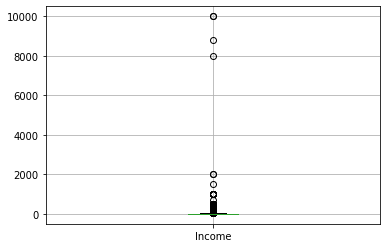

In [79]:
df_edit.boxplot(column='Income')
plt.show()

# df_edit.boxplot(column='LTV')

## Hypothesis Testing

Menguji perbedaan rata-rata income antara kelompok NPF dan tidak NPF. Gunakan Level signifikansi sebesar 5%.

In [86]:
from scipy.stats import ttest_ind

In [87]:
x1 = df_edit['Income'][df_edit['NPF']=='Ya']
x2 = df_edit['Income'][df_edit['NPF']!='Ya']

In [88]:
ttest_ind(x1, x2, equal_var = True) #asumsi varians sama

Ttest_indResult(statistic=1.1605323548958912, pvalue=0.2458419213508887)

__Interpretasi__
Karena pvalue> 0,05 maka H0 gagal ditolak, sehingga dapat disimpulkan bahwa rata-rata income kelompok NPD dan tidak NPD tidak berbeda secara signifikan.

In [90]:
print('deviasi standar x1 = %.3f dan x2 = %.3f'%(x1.std(),x2.std()))

deviasi standar x1 = 160.307 dan x2 = 37.691


Karena deviasi standar x1 dua kali lebih besar daripada x2 maka kita tidak bisa mengasumsikan variance sama, sehingga perlu diasumsikan variance antara income NPF dan tidak NPF berbeda

In [91]:
ttest_ind(x1,x2,equal_var = False) # asumsi varians beda

Ttest_indResult(statistic=1.1440147059898442, pvalue=0.25263531221651053)

meskipun kesimpulan yang hasilkan sama, tetapi asumsi yang digunakan pada pengujian kedua (varians berbeda) lebih tepat

## Regresi Linear Sederhana


In [92]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [93]:
#input dataset
x = df_edit['Income']
y = df_edit['Total_AR']

In [94]:
# change data structure
x = x.to_numpy().reshape(-1, 1)
y = y.to_numpy().reshape(-1,1)

In [95]:
regressor = LinearRegression()
regressor.fit(x,y) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
#regresssion equation
print('y = %.3f + %.3f X'%(regressor.intercept_, regressor.coef_))

y = 213.955 + 0.040 X


In [98]:
# regression equation
y_pred = regressor.predict(x)
print('R2 =%.3f'%metrics.r2_score(y,y_pred))
rmse = np.sqrt(metrics.mean_squared_error(y,y_pred))
print('RMSE =%.3f'%rmse)

R2 =0.003
RMSE =88.263


In [105]:
np.sqrt(1.0001)

1.0000499987500624

In [106]:
(1.0000499987500624*1.0000499987500624)

1.0000999999999998

## Pemodelan dengan statsmodels

In [107]:
mc = pd.read_excel (r'D:\Analytics\Learning\DSA\25 Oct\Dataset-20191025T025912Z-001\Dataset\data microchip.xlsx')

In [108]:
import statsmodels.formula.api as smf

In [109]:
# regresi pengaruh waktu terhadap number of component

In [111]:
ols_1_mc = smf.ols('number_of_component ~ year_since_1959', data=mc).fit()

In [115]:
print(ols_1_mc.summary())

                             OLS Regression Results                            
Dep. Variable:     number_of_component   R-squared:                       0.719
Model:                             OLS   Adj. R-squared:                  0.626
Method:                  Least Squares   F-statistic:                     7.688
Date:                 Fri, 25 Oct 2019   Prob (F-statistic):             0.0694
Time:                         16:21:40   Log-Likelihood:                -19.423
No. Observations:                    5   AIC:                             42.85
Df Residuals:                        3   BIC:                             42.06
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -8.9434     1

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\stattools.py:71: ValueWarning: omni_normtest is not valid with less than 8 observations; 5 samples were given.
  "samples were given." % int(n), ValueWarning)


## rmse dari statmodels

In [117]:
from statsmodels.tools.eval_measures import rmse

In [118]:
rmse(mc.number_of_component, ols_1_mc.predict(mc.year_since_1959))

11.770445880527003

In [130]:
ols_df_edit = smf.ols('Total_AR ~ Income + OTR + DP', data = df_edit).fit()
print(ols_df_edit.summary())

                            OLS Regression Results                            
Dep. Variable:               Total_AR   R-squared:                       0.886
Model:                            OLS   Adj. R-squared:                  0.886
Method:                 Least Squares   F-statistic:                 7.294e+04
Date:                Fri, 25 Oct 2019   Prob (F-statistic):               0.00
Time:                        17:17:39   Log-Likelihood:            -1.3629e+05
No. Observations:               28293   AIC:                         2.726e+05
Df Residuals:                   28289   BIC:                         2.726e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5643      0.494     53.800      0.0

In [136]:
ols_df_edit

In [137]:
rmse(df_edit.Total_AR, ols_df_edit.predict(df_edit[["Income","OTR","DP"]]))

29.905782336229407